# Modelos Logarítimicos: ajuste por mínimos cuadrados

## Preparando la información

In [1]:
#Importando paquetería necesaria

import numpy as np
import matplotlib.pyplot as plt 
import pprint
import seaborn as sns
from numpy import log
sns.set()




In [2]:
#Cargado los datos

datos = np.loadtxt('datos_para_tarea_minimos_cuadrados.txt', skiprows=1)


In [3]:
x = datos[:,0]
y = datos[:,1]

In [4]:
x

array([0.017, 0.087, 0.174, 1.11 , 1.74 , 4.09 , 5.45 , 5.96 , 0.025,
       0.111, 0.211, 0.999, 3.02 , 4.28 , 4.58 , 4.68 , 0.02 , 0.085,
       0.171, 1.29 , 3.04 , 4.29 , 5.3  , 0.02 , 0.119, 0.21 , 1.32 ,
       3.34 , 5.48 , 0.025, 0.233, 0.783, 1.35 , 1.69 , 2.75 , 4.83 ,
       5.53 ])

In [5]:
y

array([0.154, 0.296, 0.363, 0.531, 2.23 , 3.58 , 3.52 , 2.4  , 0.23 ,
       0.357, 0.366, 0.771, 2.01 , 3.28 , 2.96 , 5.1  , 0.181, 0.26 ,
       0.334, 0.87 , 3.59 , 3.4  , 3.88 , 0.18 , 0.299, 0.428, 1.15 ,
       2.83 , 4.15 , 0.234, 0.537, 1.47 , 2.48 , 1.44 , 1.84 , 4.66 ,
       6.94 ])

Text(0.5, 1.0, 'Datos')

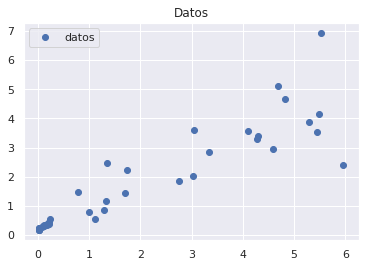

In [6]:
#Graficando los datos

plt.plot(x, y, 'o')
plt.legend(['datos'], loc='best')
plt.title('Datos')


## Modelo 1

### $$log(y) = log(b) + alog(x)$$

In [7]:
phi_1 = lambda var: np.log(var) #phi puede tomar cualquier valor
mpoints_1, = x.shape
A_1=np.ones((mpoints_1,2))
A_1[:,1] = phi_1(x)


In [8]:
x.shape

(37,)

In [9]:
A_1

array([[ 1.00000000e+00, -4.07454193e+00],
       [ 1.00000000e+00, -2.44184716e+00],
       [ 1.00000000e+00, -1.74869998e+00],
       [ 1.00000000e+00,  1.04360015e-01],
       [ 1.00000000e+00,  5.53885113e-01],
       [ 1.00000000e+00,  1.40854497e+00],
       [ 1.00000000e+00,  1.69561561e+00],
       [ 1.00000000e+00,  1.78507048e+00],
       [ 1.00000000e+00, -3.68887945e+00],
       [ 1.00000000e+00, -2.19822508e+00],
       [ 1.00000000e+00, -1.55589715e+00],
       [ 1.00000000e+00, -1.00050033e-03],
       [ 1.00000000e+00,  1.10525683e+00],
       [ 1.00000000e+00,  1.45395301e+00],
       [ 1.00000000e+00,  1.52169900e+00],
       [ 1.00000000e+00,  1.54329811e+00],
       [ 1.00000000e+00, -3.91202301e+00],
       [ 1.00000000e+00, -2.46510402e+00],
       [ 1.00000000e+00, -1.76609172e+00],
       [ 1.00000000e+00,  2.54642218e-01],
       [ 1.00000000e+00,  1.11185752e+00],
       [ 1.00000000e+00,  1.45628673e+00],
       [ 1.00000000e+00,  1.66770682e+00],
       [ 1.

In [10]:
z=np.log(y)

In [11]:
Q,R = np.linalg.qr(A_1)
beta_1 = np.linalg.solve(R,Q.T@z)

In [12]:
beta_1

array([0.26464764, 0.5756426 ])

In [13]:
z_ajustadas_1 = A_1@beta_1
y_ajustada_1=np.exp(z_ajustadas_1)
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*phi_1(x)

Text(0.5, 1.0, 'Modelo 1')

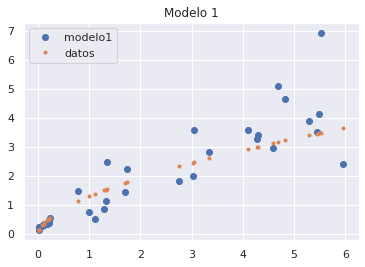

In [14]:
plt.plot(x, y, 'o', x, y_ajustada_1, '.')
plt.legend(['modelo1','datos'], loc='best')
plt.title('Modelo 1')

## Modelo 2

### $$log(y) = log(b) + alog(x) + c(log(x))^2$$

[0.04962021 0.70062919 0.06695492]


Text(0.5, 1.0, 'Modelo 2')

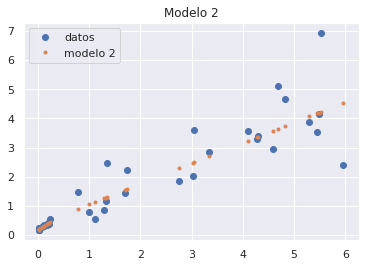

In [15]:
phi_2 = lambda var: np.log(var)
phi_2_2 = lambda var: np.log(var)**2
mpoints_2, = x.shape
A_2=np.ones((mpoints_1,3))
A_2[:,1] = phi_2(x)
A_2[:,2] = phi_2_2(x)
Q_2,R_2 = np.linalg.qr(A_2)
beta_2 = np.linalg.solve(R_2,Q_2.T@np.log(y))
print(beta_2)
z_gorro_2=A_2@beta_2
y_gorro_2=np.exp(z_gorro_2)
plt.plot(x, y, 'o', x, y_gorro_2, '.')
plt.legend(['datos', 'modelo 2'], loc='best')
plt.title('Modelo 2')


In [16]:
y_gorro_2

array([0.18386666, 0.28309221, 0.37877038, 1.13141277, 1.58127155,
       3.2198231 , 4.17920448, 4.54325166, 0.1971471 , 0.31130526,
       0.4154466 , 1.0501356 , 2.47387822, 3.3529597 , 3.56372236,
       3.63413483, 0.18889116, 0.28065304, 0.37571761, 1.26158835,
       2.48778195, 3.35997408, 4.07260317, 0.18889116, 0.32033636,
       0.41447678, 1.28312429, 2.69644838, 4.20055001, 0.1971471 ,
       0.43652127, 0.88890678, 1.30462076, 1.54603827, 2.28620845,
       3.73990901, 4.23614477])

## Calculando los ECM de ambos modelos

In [17]:
mse1 = (np.square(y - y_ajustada_1)).mean()


In [18]:
mse2 = (np.square(y - y_gorro_2)).mean()

In [21]:
mse1

0.6838335577106377

In [22]:
mse2

0.5487595633013899

#### Parece ser que el modelo 2 tiene mejor ajuste. 